In [1]:
library(ggplot2)
library(wordcloud)
library(tm)
library(RColorBrewer)
library(slam)
library(naivebayes)

Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


naivebayes 1.0.0 loaded

For more information please visit: 

https://majkamichal.github.io/naivebayes/



In [3]:
df <- read.csv('train.csv', header = T)
df <- df[1:5000,]
head(df, 5)

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"


In [4]:
dimensions <- dim(df)
dimensions

[1] 5000    3

Meaning of the label
- Barely-True - 0
- False - 1
- Half-True - 2
- Mostly-True - 3
- Not-Known - 4
- True - 5

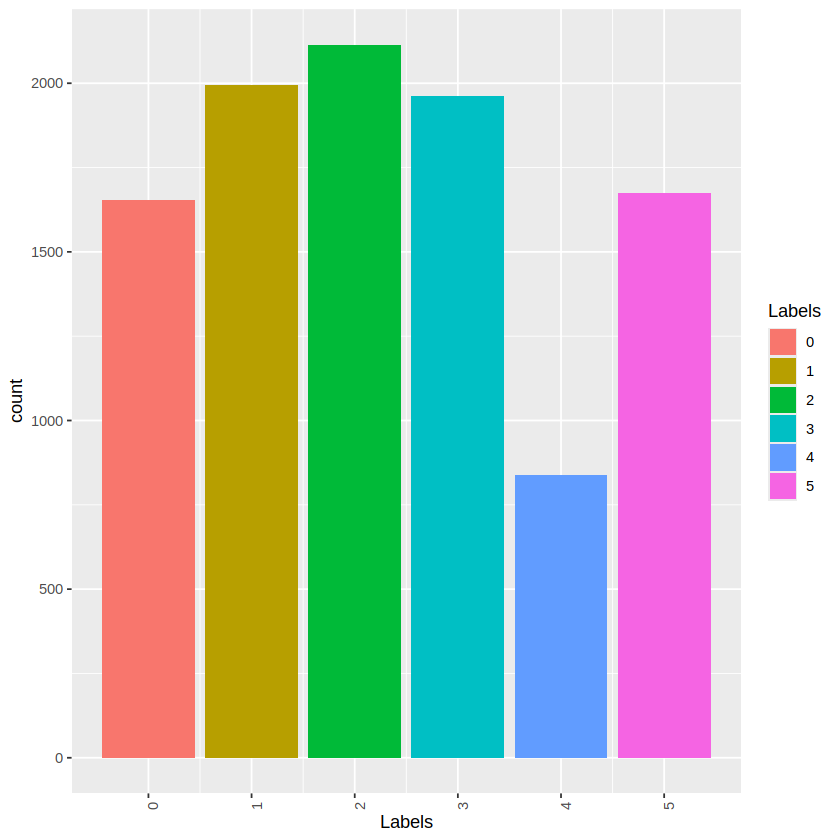

In [4]:
ggplot(data = df, aes(x = Labels, fill = as.factor(Labels))) +
  geom_bar() +
  scale_x_continuous(breaks = unique(df$Labels)) + # Ensure all x-axis labels are shown
  labs(x = 'Labels', fill = 'Labels') + # Add labels for x-axis and legend
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) # Rotate x-axis labels for better visibility

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
“transformation drops documents”


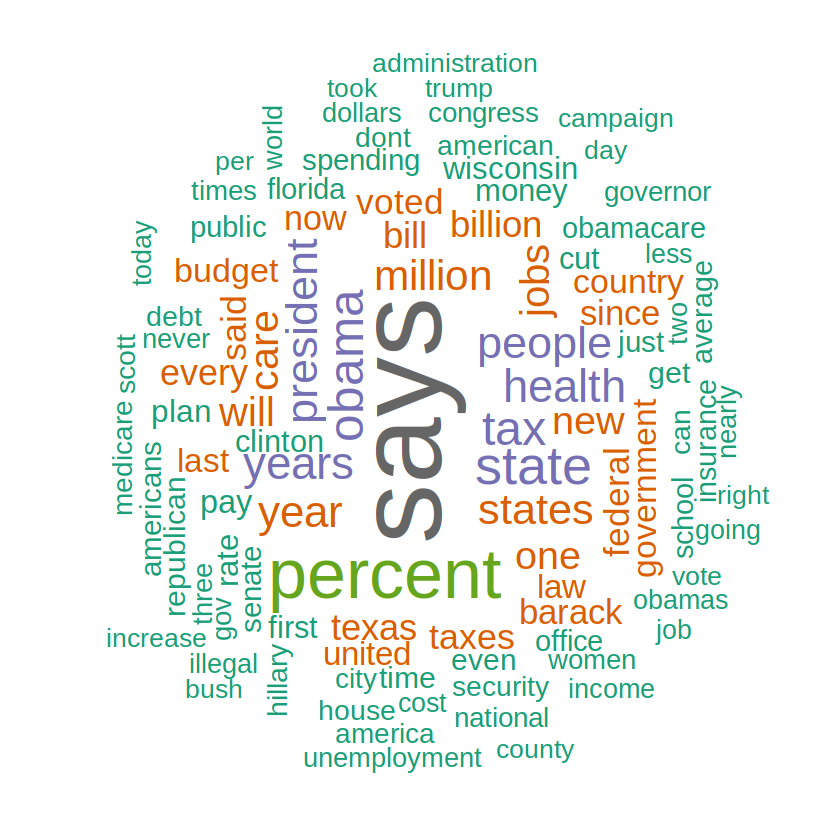

In [5]:
# word cloud for the text

train_qs <- as.character(df$Text)

text_combined <- paste(train_qs, collapse = " ")

corpus <- Corpus(VectorSource(text_combined))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))

wordcloud(corpus, scale = c(6, 1), max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"), rot.per = 0.35, 
          use.r.layout = FALSE)

par(mar = c(1, 1, 1, 1))

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
“transformation drops documents”


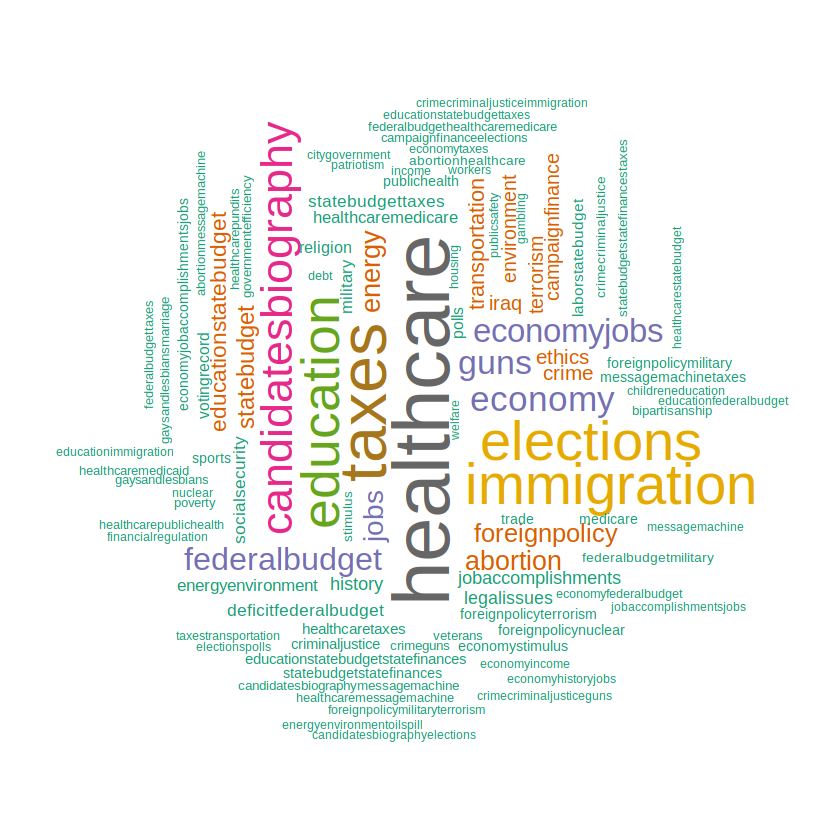

In [6]:
# word cloud for the text_tag

train_qs <- as.character(df$Text_Tag)

text_combined <- paste(train_qs, collapse = " ")

corpus <- Corpus(VectorSource(text_combined))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("en"))

wordcloud(corpus, scale = c(4, 0.5), max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"), rot.per = 0.35, 
          use.r.layout = FALSE)

par(mar = c(1, 1, 1, 1))

In [5]:
library(tm)
library(SnowballC)

# Definire le parole di stop in inglese
stopset <- stopwords("en")

# Creare una funzione per la vettorizzazione TF-IDF
vectorize_tfidf <- function(docs) {
  # Creare un corpus
  corpus <- Corpus(VectorSource(docs))
  
  # Applicare trasformazioni al testo
  corpus <- tm_map(corpus, content_transformer(tolower))  # Converti in minuscolo
  corpus <- tm_map(corpus, removePunctuation)             # Rimuovi la punteggiatura
  corpus <- tm_map(corpus, removeNumbers)                 # Rimuovi i numeri
  corpus <- tm_map(corpus, removeWords, stopset)          # Rimuovi le stop words
  corpus <- tm_map(corpus, stripWhitespace)               # Rimuovi spazi bianchi extra
  corpus <- tm_map(corpus, content_transformer(function(x) iconv(x, to="ASCII//TRANSLIT")))  # Rimuovi accenti
  
  # Creare una matrice di documenti-termine
  dtm <- as.data.frame(as.matrix(DocumentTermMatrix(corpus)))
  
  # row_sums <- rowSums(dtm)
  # dtm <- dtm / row_sums
  
  return(dtm)
}

# Esempio di utilizzo con un vettore di testi
texts <- c("This is a sample document cazzone.", "This document is another example cazzon diobestia.")
tfidf_matrix <- vectorize_tfidf(texts)

print(tfidf_matrix)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopset):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(function(x) iconv(x, :
“transformation drops documents”


  cazzone document sample another cazzon diobestia example
1       1        1      1       0      0         0       0
2       0        1      0       1      1         1       1


In [6]:
x <- vectorize_tfidf(df$Text)

# Aggiungere le etichette al data frame
x$Labels <- as.factor(df$Labels)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”


Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopset):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(function(x) iconv(x, :
“transformation drops documents”


In [ ]:
dim(x)

[1] 5000 8539

In [7]:
head(x, 5)

,abortions,annies,demand,group,list,political,says,supports,thirdtrimester,administration,⋯,harmed,doyles,diplomacy,travels,dial,tone,shortterm,showhillary,flipped,Labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,1,1,1,1,1,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2


In [8]:
n <- nrow(x)
train_ratio <- 0.7
train_indices <- sample(1:n, size = round(train_ratio * n))

train_set <- x[train_indices, ]
test_set <- x[-train_indices, ]

In [9]:
dim(train_set)
head(train_set, 5)

[1] 3500 8539

,abortions,annies,demand,group,list,political,says,supports,thirdtrimester,administration,⋯,harmed,doyles,diplomacy,travels,dial,tone,shortterm,showhillary,flipped,Labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2299,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
4163,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
1034,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
1953,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
1386,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2


In [ ]:
dim(test_set)
head(test_set, 5)

[1] 1500 8539

,abortions,annies,demand,group,list,political,says,supports,thirdtrimester,administration,⋯,harmed,doyles,diplomacy,travels,dial,tone,shortterm,showhillary,flipped,Labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.1111111,0.1111111,0.1111111,0.1111111,0.1111111,0.1111111,0.1111111,0.1111111,0.1111111,0,⋯,0,0,0,0,0,0,0,0,0,1
4,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,⋯,0,0,0,0,0,0,0,0,0,1
12,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,⋯,0,0,0,0,0,0,0,0,0,2
14,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,⋯,0,0,0,0,0,0,0,0,0,3
20,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,⋯,0,0,0,0,0,0,0,0,0,3


In [15]:
M <- train_set[, -ncol(train_set)]
dim(M)

[1] 3500 8538

In [23]:
M_test <- as.matrix(test_set[, -ncol(test_set)])

In [16]:
y <- train_set$Labels
length(y)

[1] 3500

In [19]:
y_test <- test_set$Labels

In [17]:
laplace <- 1
mnb <- multinomial_naive_bayes(x = M, y = y, laplace = laplace)

Warning message:
“multinomial_naive_bayes(): x was coerced to matrix.”


In [25]:
predictions <- predict(mnb, newdata = M_test)
predictions


[1] 2 1 1 1 4 3 1 3 5 3 2 0 3 0 1 2 5 1 2 2 1 2 2 2 1 3 2 1 1 5 1 2 3 1 3 1 1
  [38] 2 1 1 1 1 1 3 5 2 2 5 2 2 2 3 5 3 2 2 3 3 2 1 5 2 5 3 2 5 2 2 3 2 5 5 2 2
  [75] 2 1 2 5 2 0 0 2 1 2 2 2 0 2 3 5 0 1 1 3 3 2 2 0 2 2 2 3 3 2 2 4 1 1 3 2 3
 [112] 3 3 3 1 3 2 3 5 3 0 3 1 1 3 2 2 0 1 2 1 2 3 1 1 0 2 5 2 4 2 1 5 0 3 0 2 2
 [149] 1 5 5 2 1 3 1 3 3 5 4 2 3 2 3 3 3 0 1 3 0 5 1 3 0 1 1 1 1 2 2 3 2 5 2 1 5
 [186] 1 0 5 2 2 2 3 2 5 3 2 2 1 3 3 1 4 3 3 1 5 2 3 2 1 3 0 3 1 5 3 1 3 4 3 5 2
 [223] 2 0 1 1 1 2 1 1 1 3 2 2 3 2 3 2 1 2 3 3 5 5 5 2 3 5 5 2 1 2 4 3 0 4 1 3 3
 [260] 1 1 3 2 1 3 2 1 3 3 5 1 3 4 1 3 4 5 2 2 0 2 3 3 3 5 2 1 2 2 3 3 1 2 0 2 3
 [297] 0 1 2 0 3 0 5 2 5 0 3 2 3 3 3 2 3 1 2 2 2 1 1 5 0 1 3 0 0 1 5 2 5 0 3 3 3
 [334] 2 1 5 1 3 3 2 3 1 0 2 1 1 0 0 2 1 1 5 2 5 1 5 2 5 2 3 0 2 1 1 3 1 1 5 3 5
 [371] 2 0 2 1 0 1 2 2 3 0 5 1 3 0 1 3 0 1 0 1 1 0 2 0 3 2 3 1 2 2 1 3 2 3 2 2 2
 [408] 5 1 1 1 0 1 5 1 2 3 2 3 2 2 5 1 5 3 2 0 3 3 1 3 5 2 0 1 2 3 5 0 3 0 1 3 1
 [445] 2 2 2 2 3 2 3 3 2 0 2 1 3 5 2 5 3 1 3 2 1 0 0 1 5 2 1 2 5 2 2 2 2 3 3 2 0
 [482] 1 0 2 1 2 5 0 1 0 0 1 2 0 2 3 2 3 5 5 1 5 1 2 0 1 1 3 2 1 1 2 1 3 2 0 2 3
 [519] 3 1 2 1 3 0 5 3 1 5 1 5 2 2 1 0 3 3 3 3 1 2 0 2 5 3 1 1 2 0 5 3 2 1 3 3 3
 [556] 2 3 1 5 5 1 2 2 0 2 5 1 2 2 1 3 1 0 3 5 1 5 2 2 1 3 2 5 2 1 1 5 2 5 1 2 3
 [593] 2 3 1 2 1 4 3 1 1 0 1 3 2 1 2 1 2 2 1 2 1 3 1 2 5 1 3 2 1 1 0 1 3 1 2 1 1
 [630] 2 2 5 2 2 5 0 2 1 3 2 1 1 0 1 2 1 2 1 2 5 2 2 2 2 0 1 3 1 5 3 2 5 5 2 1 3
 [667] 2 2 2 1 2 1 3 2 2 2 1 2 1 4 2 5 2 3 1 1 3 3 2 3 0 2 0 3 2 2 2 5 1 3 2 3 2
 [704] 5 2 2 3 5 5 1 3 2 2 2 1 3 3 3 5 5 5 3 0 2 1 1 5 5 0 1 2 2 3 2 3 3 2 2 5 3
 [741] 3 0 2 2 3 2 3 1 2 5 2 3 2 0 0 1 3 2 2 2 1 5 2 0 0 2 3 5 5 0 3 2 1 5 2 5 0
 [778] 2 2 5 3 2 1 5 2 0 1 1 1 2 0 5 1 5 3 5 1 1 2 2 0 5 5 1 1 0 3 2 3 1 0 3 1 3
 [815] 3 0 1 3 2 0 2 2 1 2 2 3 3 2 0 1 5 2 2 1 3 2 2 1 3 1 3 3 2 5 2 3 1 5 5 2 2
 [852] 2 4 3 3 1 1 2 5 2 4 2 2 2 3 2 1 3 5 3 1 3 1 1 3 2 0 1 2 5 2 2 1 1 2 2 2 5
 [889] 1 5 0 3 3 0 1 1 0 2 1 3 5 2 5 2 2 0 3 3 4 1 3 1 3 5 3 1 2 2 2 2 2 1 3 5 2
 [926] 1 2 1 2 3 3 0 2 2 5 2 1 2 1 1 3 0 2 0 2 2 1 1 2 1 5 2 5 0 2 2 1 3 1 2 2 3
 [963] 2 2 3 3 5 4 1 1 1 1 2 2 4 2 1 2 3 4 1 3 0 2 1 5 2 3 1 2 2 1 3 2 3 1 1 2 2
[1000] 2 1 0 0 5 1 1 1 2 2 2 1 1 5 1 1 5 0 3 1 2 1 2 2 3 1 3 2 2 1 4 1 3 1 3 0 0
[1037] 1 3 5 2 2 3 3 2 2 5 0 5 0 0 0 1 0 5 0 1 2 2 1 1 1 2 3 5 1 1 0 3 2 2 2 5 5
[1074] 2 1 5 1 3 3 1 3 0 2 5 3 3 0 2 1 3 2 0 3 2 5 1 0 1 2 3 2 1 2 3 5 2 1 2 1 1
[1111] 1 2 2 1 0 1 1 1 1 1 3 2 2 1 2 5 2 0 3 1 3 1 2 1 5 2 3 1 3 0 2 3 2 3 3 3 1
[1148] 1 1 5 1 1 2 1 2 5 1 1 2 1 3 1 5 3 2 1 2 2 1 2 5 3 3 5 3 5 3 2 2 0 2 0 2 2
[1185] 0 2 1 3 3 5 0 3 5 3 1 1 3 2 5 1 0 3 1 0 0 3 1 1 3 1 0 2 3 2 1 1 3 5 1 2 1
[1222] 3 2 2 2 0 3 5 3 5 2 2 3 5 2 0 2 1 0 2 3 2 2 1 2 5 3 3 3 1 2 5 2 2 1 3 5 2
[1259] 3 1 3 3 2 2 1 2 1 3 2 1 3 2 2 2 2 2 2 1 1 1 3 3 3 1 2 3 2 2 2 2 3 2 2 3 1
[1296] 3 1 3 2 5 2 0 2 5 4 2 1 2 5 1 3 2 3 2 1 5 3 2 2 2 3 1 3 3 1 2 1 3 5 3 0 1
[1333] 5 2 1 2 1 1 3 3 5 3 1 1 5 2 0 0 2 3 2 5 2 2 3 1 1 3 3 1 2 1 1 3 1 3 1 3 3
[1370] 1 1 3 2 1 1 1 1 5 5 2 3 2 1 3 1 1 0 1 5 1 0 3 2 5 3 1 2 3 0 2 1 0 1 1 3 5
[1407] 2 1 1 2 0 2 1 2 3 2 0 5 0 3 2 2 2 2 3 2 2 0 3 1 0 2 2 2 1 1 3 5 5 1 1 3 1
[1444] 3 2 2 2 1 2 2 3 1 3 5 1 2 1 3 0 5 2 1 3 2 2 0 1 2 0 1 2 2 2 5 5 0 3 1 1 3
[1481] 3 2 0 3 2 2 3 1 5 0 2 3 5 1 1 2 3 2 1 2
Levels: 0 1 2 3 4 5

In [26]:
accuracy <- sum(predictions == y_test) / length(y_test)
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.25"


In [27]:
confusion_matrix <- table(Predicted = predictions, True = y_test)
print(confusion_matrix)

         True
Predicted   0   1   2   3   4   5
        0  39  27  30  17  17  16
        1  55 102  62  52  44  61
        2  69  79 106  96  37  68
        3  43  57  61  85  17  61
        4   5   4   3   2   5   1
        5  22  25  30  54  10  38


In [6]:
library(e1071)
model <- naiveBayes(Labels ~ ., data = train_set)

ERROR: Error in is.factor(y): argument "y" is missing, with no default


In [ ]:
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1          2          3          4          5 
0.15085714 0.20371429 0.20542857 0.19057143 0.08028571 0.16914286 

Conditional probabilities:
   abortions
Y           [,1]        [,2]
  0 0.0001462416 0.003354006
  1 0.0007010940 0.008324311
  2 0.0005512761 0.007520980
  3 0.0004872564 0.009125965
  4 0.0000000000 0.000000000
  5 0.0009384384 0.015129509

   annies
Y   [,1] [,2]
  0    0    0
  1    0    0
  2    0    0
  3    0    0
  4    0    0
  5    0    0

   demand
Y           [,1]        [,2]
  0 0.0001056189 0.002422337
  1 0.0000000000 0.000000000
  2 0.0000000000 0.000000000
  3 0.0000000000 0.000000000
  4 0.0000000000 0.000000000
  5 0.0002413127 0.005871392

   group
Y           [,1]        [,2]
  0 1.728310e-04 0.003963825
  1 6.013226e-04 0.007431159
  2 3.769905e-04 0.006007117
  3 8.329169e-05 0.002151120
  4 1.5508

In [ ]:
predictions <- predict(model, test_set)

In [ ]:
predictions

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [38] 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [75] 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [149] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [186] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 0 4 5 4 4 4 4 4 4
 [223] 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [260] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [297] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4
 [334] 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [371] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [408] 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [445] 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [482] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [519] 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4
 [556] 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4
 [593] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [630] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4
 [667] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [704] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [741] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [778] 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [815] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [852] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [889] 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4
 [926] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [963] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4
[1000] 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1037] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1074] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 0 4 4 4 5 4 4
[1111] 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1148] 0 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1185] 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1222] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1259] 5 4 0 4 4 4 4 5 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4
[1296] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4
[1333] 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1370] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4
[1407] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 5 4 4 4 4 4 4 4 4 4 4 4 4 4
[1444] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1481] 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
Levels: 0 1 2 3 4 5

In [ ]:
confusion_matrix <- table(predictions, test_set$Labels)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(confusion_matrix)
cat("Accuracy:", round(accuracy * 100, 2), "%\n")

           
predictions   0   1   2   3   4   5
          0   5   5   5   9   1   4
          1   0   0   1   0   0   0
          2   2   1   1   1   1   1
          3   2   0   1   3   0   0
          4 238 290 277 288 125 225
          5   1   3   3   4   0   3
Accuracy: 9.13 %
